# Student Mental_Health_Analysis

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


SyntaxError: invalid syntax (3436150072.py, line 5)

In [58]:
df = pd.read_csv('student record.csv')

# data processing

In [59]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [60]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [61]:
df.shape


(101, 11)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [63]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [64]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [65]:
df.duplicated().sum()

0

# Data Cleaning and Transformation

In [20]:
# There is only one null value in the dataset so dropping it won't affect our analysis. However, there are discrepancies in the data type of some columns, so we need to convert them to the correct data type. It is important also to change the column names to make them more user-friendly and readable

## dropping the null value

In [21]:
df=df.dropna()

In [66]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

## changing the column names

In [67]:
df_new_column_names = {'Timestamp':'Date','Choose your gender':'Gender','Age':'Age','What is your course?':'Major',
                      'Your current year of Study':'Year of Study',
                      'What is your CGPA?':'CGPA','Do you have Depression?':'Depression',
                      'Do you have Anxiety?':'Anxiety',
                      'Do you have Panic attack?':'Panic Attacks',
                      'Did you seek any specialist for a treatment?':'Treatment from a speacialist'}
df.rename(columns = df_new_column_names, inplace = True)

In [69]:
df.head()

,Date,Gender,Age,Major,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic Attacks,Treatment from a speacialist
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [106]:


df['CGPA']=df['CGPA'].astype(str)

# function to handle ranges by taking he average
def convert_gpa(value):
    if '-' in value:
        start, end = map(float,value.split(' - '))
        return round((start + end )/2, 2)
    else:
        return round(float(value), 2)
    
# Apply the function to the 'gpa' column
df['CGPA']=df['CGPA'].apply(convert_gpa).astype(float)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          101 non-null    object 
 1   Gender                        101 non-null    object 
 2   Age                           100 non-null    float64
 3   Major                         101 non-null    object 
 4   Year of Study                 101 non-null    object 
 5   CGPA                          101 non-null    float64
 6   Marital status                101 non-null    object 
 7   Depression                    101 non-null    object 
 8   Anxiety                       101 non-null    object 
 9   Panic Attacks                 101 non-null    object 
 10  Treatment from a speacialist  101 non-null    object 
dtypes: float64(2), object(9)
memory usage: 8.8+ KB


## the data stamp is not useful for our analysis, so we will drop it. 

In [75]:
df = df.drop(['Date'],axis = 1)

In [107]:
df['Major'] = df['Major'].replace({'Engineering': 'Engineering', 'Islamic education': 'Islamic education',
                                   'BIT': 'Computer Science','Laws': 'Law', 'Pendidikan islam': 'Islamic Education', 
                                   'BCS':'Computer Science', 'Irkhs': 'Others','Psychology': 'Medical', 'KENMS':'Others', 
                                   'Accounting ':'Finance','ENM':'Others', 'KOE':'Others', 'Banking Studies':'Finance', 
                                   'Business Administration': 'Finance', 'KIRKHS': 'Others', 'Usuluddin ': 'Islamic Studies',
                                   'TAASL':'Others','Engine':'Engineering','ALA': 'Others','Biomedical science':'Medical', 
                                   'koe':'Others', 'Kirkhs':'Others', 'BENL':'Others','Benl':'Others', 'IT': 'Computer Science',
                                   'CTS': 'Computer Science', 'Biotechnology':'Medical', 'engin':'Engineering',
                                   'Econs':'Finance', 'MHSC':'Others', 'Malcom':'Others', 'Kop':'Others', 
                                   'Biotechnology':'Medical', 'Communication ':'Computer Science','Diploma Nursing':'Medical', 
                                   'Pendidikan Islam ':'Islamic Education', 'Radiography':'Medical','psychology':'Medical',
                                   'Fiqh fatwa ':'Islamic Education', 'DIPLOMA TESL': 'Others',
                                   'Koe':'Others', 'Fiqh':'Islamic Education', 
                                   'Nursing ':'Medical','Pendidikan Islam':'Others'})

In [77]:
df['Major'].unique()


array(['Engineering', 'Islamic education', 'Computer Science', 'Law',
       'Mathemathics', 'Islamic Education', 'Human Resources', 'Others',
       'Medical', 'Finance', 'Marine science', 'Islamic Studies',
       'Human Sciences '], dtype=object)

In [78]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [79]:
df['Year of Study'].replace({'year 1': 'year 1', 'year 2': 'year 2', 'Year 1': 'year 1', 'year 3': 'year 3', 'year 4': 'year 4', 'Year 2': 'year 2',
       'Year 3': 'year 3'}, inplace = True)

In [80]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [81]:
df.head()

,Gender,Age,Major,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic Attacks,Treatment from a speacialist
0,Female,18.0,Engineering,year 1,3.25,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.25,No,No,Yes,No,No
2,Male,19.0,Computer Science,year 1,3.25,No,Yes,Yes,Yes,No
3,Female,22.0,Law,year 3,3.25,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.25,No,No,No,No,No


In [82]:
df.describe()

,Age,CGPA
count,100.00000,101.000000
mean,20.53000,3.358515
std,2.49628,0.585159
min,18.00000,0.990000
25%,18.00000,3.250000
50%,19.00000,3.250000
75%,23.00000,3.750000
max,24.00000,3.750000


In [ ]:
 #the descriptive statistics show that the majority of students are between the age of the 18 and 22, the median age is 20, and the mean of the cgpa is 3.3

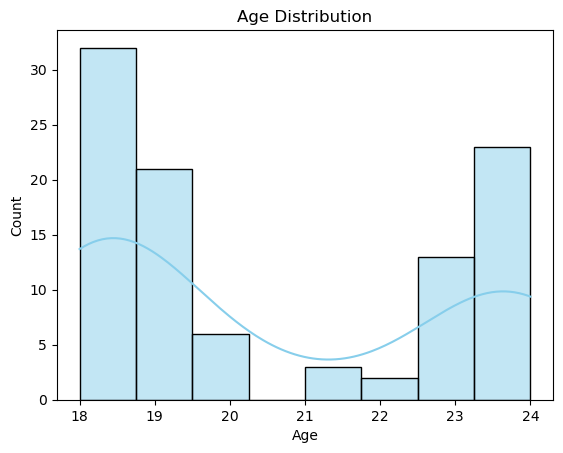

In [108]:
sns.histplot(df['Age'], kde =True , color = 'skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Distribution of Male and Female Students

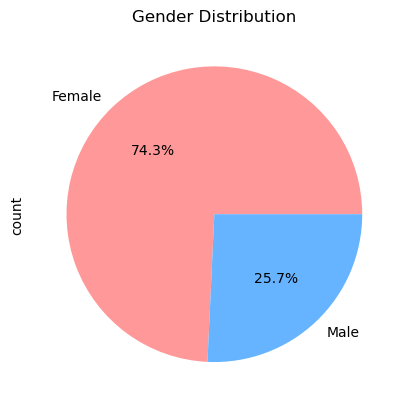

In [84]:
df.Gender.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Gender Distribution')
plt.show()

## What is the Age Distribution Amongst Different Academic Levels 

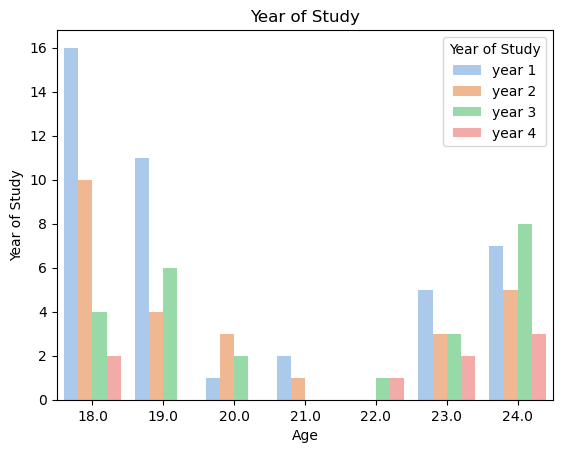

In [85]:
sns.countplot(x='Age', hue='Year of Study', data=df, palette='pastel')
plt.title('Year of Study')
plt.xlabel('Age')
plt.ylabel('Year of Study')
plt.show()

## Are there specific attributes or interests within age groups that drive their choice of disciplines?

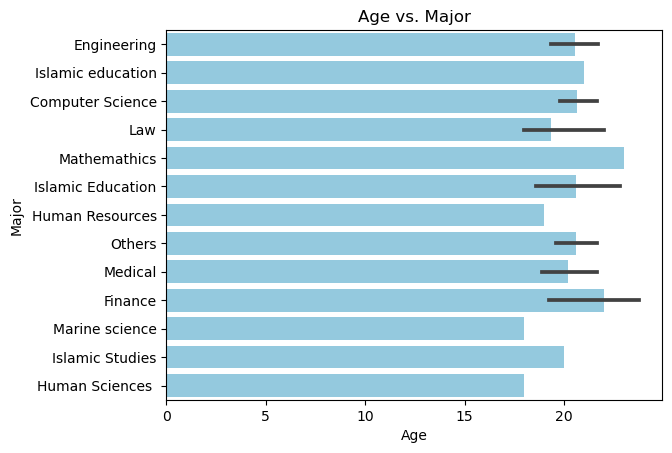

In [86]:
sns.barplot(x='Age', y='Major', data=df, color='skyblue')
plt.title('Age vs. Major')
plt.xlabel('Age')
plt.ylabel('Major')
plt.show()

## Distribution merial Status


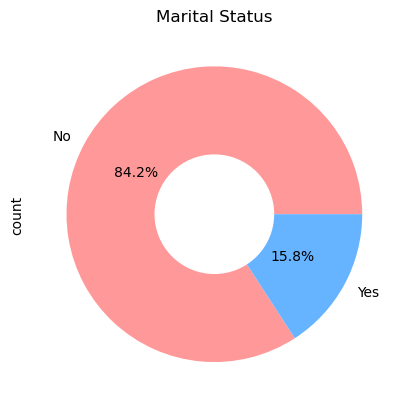

In [88]:
df['Marital status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('Marital Status')
plt.show()

## Does Marital Status have an impact on CGPA?

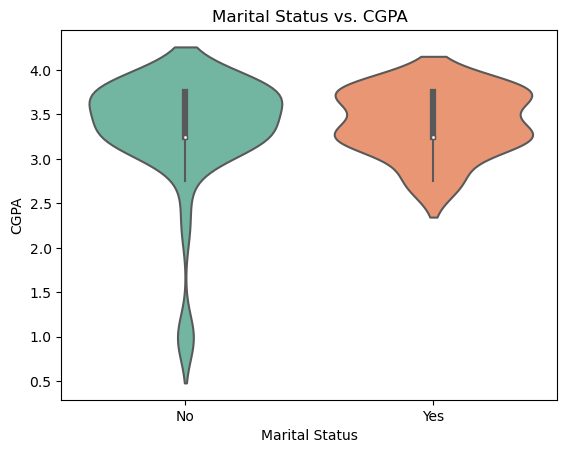

In [89]:
sns.violinplot(x='Marital status', y='CGPA', data=df, palette='Set2')
plt.title('Marital Status vs. CGPA')
plt.xlabel('Marital Status')
plt.ylabel('CGPA')
plt.show()

## What is the Distribtuion of Depressed and Not Depressed?

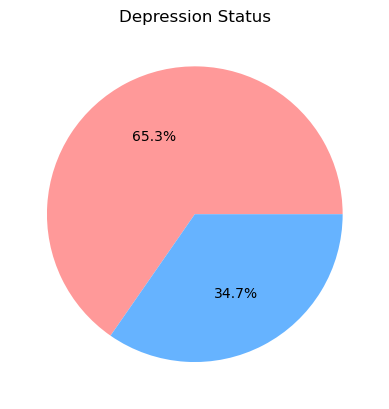

In [90]:
plt.pie(df['Depression'].value_counts(), autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Depression Status')
plt.show()

## Does being Marrried have an impact on Depressionn Status:

In [91]:
df_depression = df[df['Depression'] == 'Yes']

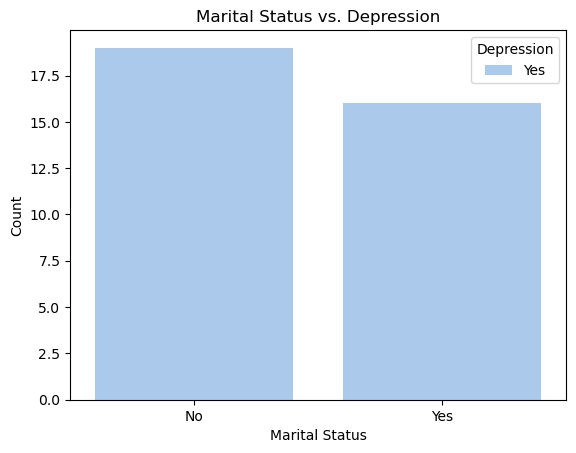

In [92]:
sns.countplot(x='Marital status', hue='Depression', data=df_depression, palette='pastel')
plt.title('Marital Status vs. Depression')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Does a lower CGPA correlate with a higher likelihood of experiencing panic attacks and depression among students?

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Correlation between CGPA and Panic Attacks')

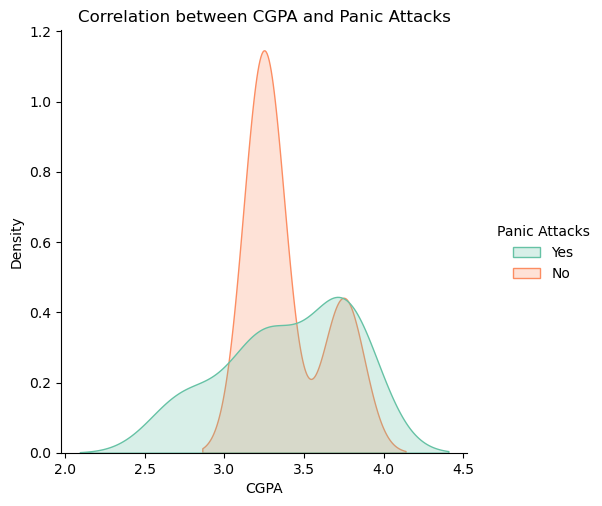

In [94]:
sns.displot(data=df_depression, x='CGPA', hue='Panic Attacks', palette='Set2', kind='kde', fill=True)
plt.title('Correlation between CGPA and Panic Attacks')

## What is the Distribution of Depresssion across different ages?

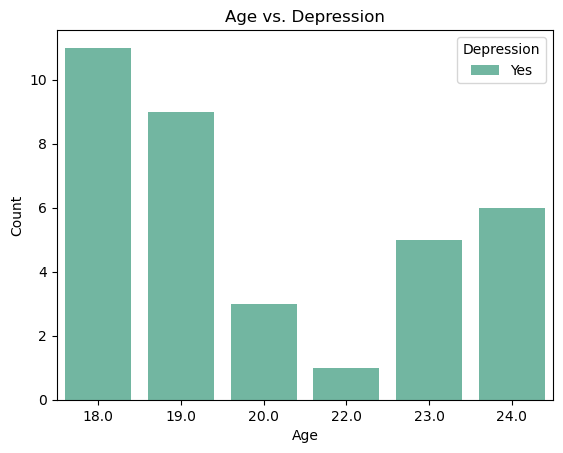

In [95]:
sns.countplot(x='Age', hue='Depression', data=df_depression, palette='Set2')
plt.title('Age vs. Depression')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Does having a lower CGPA correlate with a higher likelihood of experiencing depression among students?

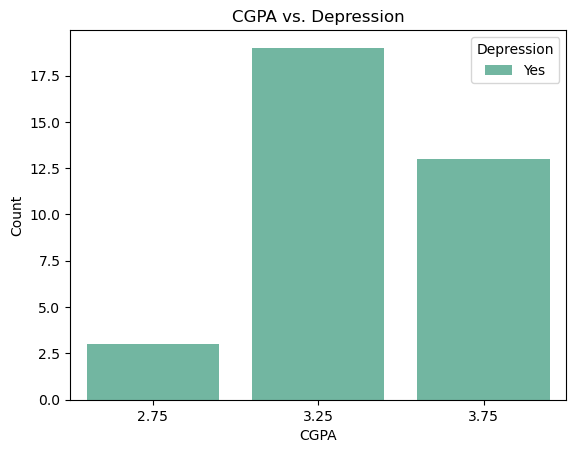

In [96]:
sns.countplot(x='CGPA', hue='Depression', data=df_depression, palette='Set2')
plt.title('CGPA vs. Depression')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

## Does the Year of Study have an impact on Panic Attacks

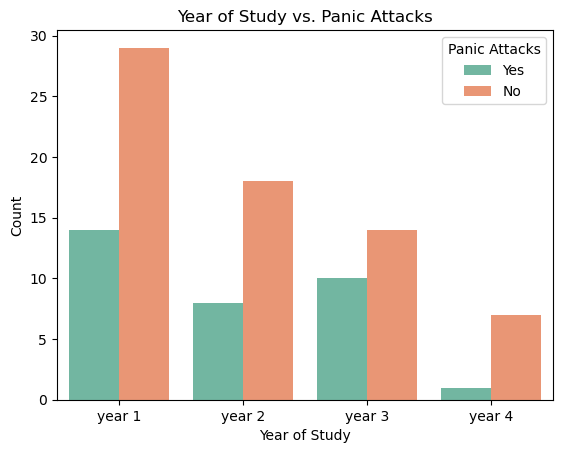

In [97]:
sns.countplot(x='Year of Study', hue='Panic Attacks', data=df, palette='Set2')
plt.title('Year of Study vs. Panic Attacks')
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.show()


## Does having a lower CGPA lead to Anxiety?

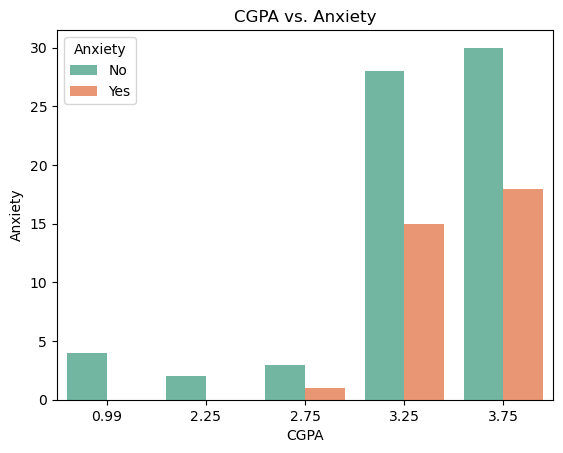

In [98]:
sns.countplot(x='CGPA', hue='Anxiety', data=df, palette='Set2')
plt.title('CGPA vs. Anxiety')
plt.xlabel('CGPA')
plt.ylabel('Anxiety')
plt.show()

## What is the Correlation between Major, Anxiety and Gender?

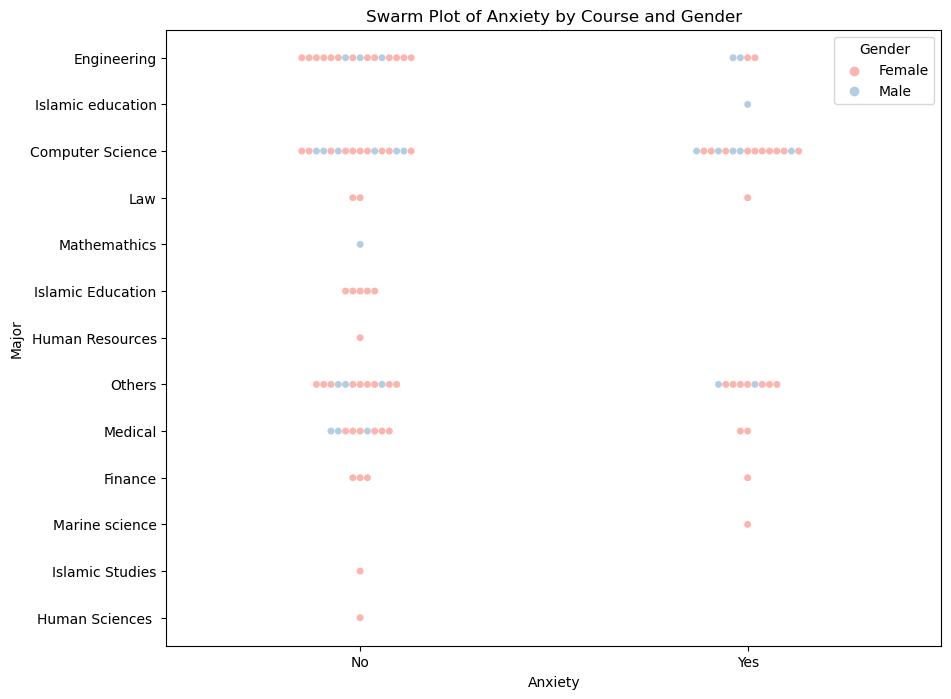

In [99]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=df, x='Anxiety', y='Major', hue='Gender', palette='Pastel1')
plt.title('Swarm Plot of Anxiety by Course and Gender')
plt.xlabel('Anxiety')
plt.ylabel('Major')
plt.show()

## conclusion

Despite the overall lower percentage (about 35%) of students who experienced depression, there is a noteworthy finding that students with a CGPA of 3.25 demonstrate a higher prevalence of depression compared to those with CGPAs of 2.75 and 3.75. This prompts further exploration into factors contributing to the heightened incidence of depression among students with a CGPA of 3.25.

An interesting pattern emerges regarding panic attacks, where individuals in their second year of study exhibit instances of panic attacks. This observation raises questions about potential stressors or challenges specific to the second year of academic pursuits that may influence the occurrence of panic attacks.

Contrary to expectations, single students exhibit instances of both panic attacks and depression compared to their married counterparts. This observation challenges assumptions about the perceived support systems in marital relationships and suggests a need for a nuanced exploration of the factors influencing mental health across different relationship statuses.

A concerning observation is that all the students who experienced depression did not seek medical treatment. This highlights a potential gap in mental health support systems, raising questions about the accessibility of mental health resources on campus and the need for interventions to encourage seeking professional help among affected students

## recommendation